In [ ]:
# koneksikan dengan google drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
no_findings        = ('/content/gdrive/MyDrive/Splitted/train/no_findings')
covid              = ('/content/gdrive/MyDrive/Splitted/train/covid')
normal             = ('/content/gdrive/MyDrive/Splitted/train/normal')
pneumonia_bacteria = ('/content/gdrive/MyDrive/Splitted/train/pneumonia_bacterial')
pneumonia_viral    = ('/content/gdrive/MyDrive/Splitted/train/pneumonia_viral')

print('total training no_findings images       :', len(os.listdir(no_findings)))
print('total training covid images             :', len(os.listdir(covid)))
print('total training normal images            :', len(os.listdir(normal)))
print('total training pneumonia_bacteria images:', len(os.listdir(pneumonia_bacteria)))
print('total training pneumonia_viral images   :', len(os.listdir(pneumonia_viral)))

total training no_findings images       : 400
total training covid images             : 256
total training normal images            : 356
total training pneumonia_bacteria images: 359
total training pneumonia_viral images   : 339


In [ ]:
no_findings_files = os.listdir(no_findings)
covid_files = os.listdir(covid)
normal_files = os.listdir(normal)
pneumonia_bacteria_files = os.listdir(pneumonia_bacteria)
pneumonia_viral_files = os.listdir(pneumonia_viral)

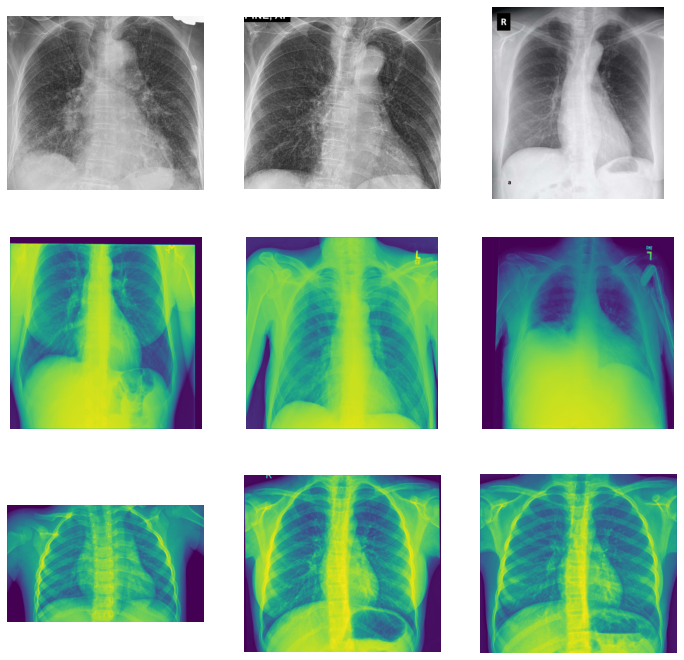

In [ ]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 3

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4,nrows * 4)

pic_index += 9
next_covid = [os.path.join(covid, fname) for fname in covid_files[pic_index-3:pic_index]]
next_no_findings = [os.path.join(no_findings, fname) for fname in no_findings_files[pic_index-3:pic_index]]
next_normal = [os.path.join(normal, fname) for fname in normal_files[pic_index-3:pic_index]]

for i, img_path in enumerate(next_covid+next_no_findings+next_normal):
  #print(img_path)
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [ ]:
height = 150
width = 150
batch_size = 32

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

generator_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


TRAINING_DIR = "/content/gdrive/MyDrive/Splitted/train"
train_generator = generator_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(height, width),
	class_mode='categorical',
  batch_size=batch_size
)

VALIDATION_DIR = "/content/gdrive/MyDrive/Splitted/val"
validation_generator = generator_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(height,width),
	class_mode='categorical',
  batch_size=batch_size
)

Found 1710 images belonging to 5 classes.
Found 212 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_acc')>0.90):
            print("\nAkurasi validasi telah mencapai >90%!")
            self.model.stop_training = True


acc_callbacks = myCallback()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Conv2D, MaxPooling2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Activation

In [ ]:
model = Sequential()
#feature extraxtion
model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(16, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
  
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.002))
model.add(Dense(5, activation= 'softmax'))

print(model.summary())

# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 146, 146, 16)      1216      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 69, 69, 32)        12832     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 30, 30, 64)        51264     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 14400)           

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data = validation_generator)

Epoch 1/50
54/54 [==============================] - 47s 881ms/step - loss: 1.5681 - acc: 0.2959 - val_loss: 1.5751 - val_acc: 0.2406
Epoch 2/50
54/54 [==============================] - 46s 862ms/step - loss: 1.3309 - acc: 0.4257 - val_loss: 1.4296 - val_acc: 0.3208
Epoch 3/50
54/54 [==============================] - 46s 862ms/step - loss: 1.1859 - acc: 0.4825 - val_loss: 1.3287 - val_acc: 0.3726
Epoch 4/50
54/54 [==============================] - 46s 847ms/step - loss: 1.1519 - acc: 0.4889 - val_loss: 1.2332 - val_acc: 0.3774
Epoch 5/50
54/54 [==============================] - 46s 854ms/step - loss: 1.0492 - acc: 0.5532 - val_loss: 1.2657 - val_acc: 0.4387
Epoch 6/50
54/54 [==============================] - 46s 852ms/step - loss: 1.0020 - acc: 0.5947 - val_loss: 1.4654 - val_acc: 0.3491
Epoch 7/50
54/54 [==============================] - 46s 857ms/step - loss: 0.9696 - acc: 0.5901 - val_loss: 1.4040 - val_acc: 0.4717
Epoch 8/50
54/54 [==============================] - 46s 860ms/step - 

In [ ]:
import json

target_dir = '/content/gdrive/MyDrive/tubes_ml/model'

# simpan history model pertama
history_dict = history.history
json.dump(history_dict, open(target_dir + '/history_model_cnn2.json', 'w'))

# simpan model pertama dan weight-nya
model.save(target_dir + '/model_cnn2.h5')
model.save_weights(target_dir + '/model_cnn2_weights.h5')

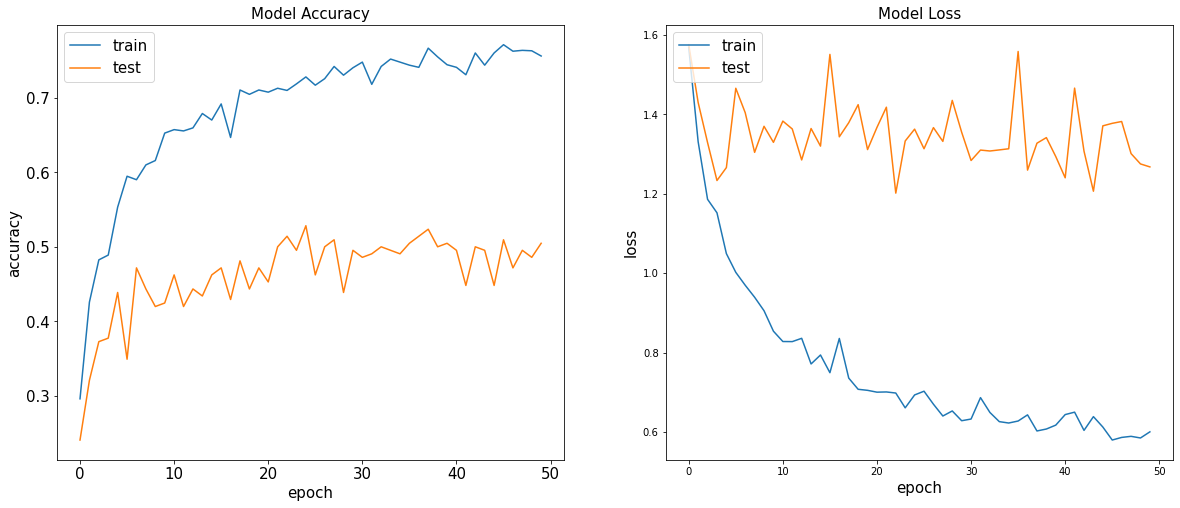

In [ ]:
plt.figure(figsize = (20,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.subplot(1, 2, 1) 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'test'], loc='upper left', fontsize=15)
#plt.show()

#plt.figure(figsize = (10,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'test'], loc='upper left', fontsize=15)
plt.show()

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import tensorflow as tf
from keras.preprocessing import image

from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

Found 216 images belonging to 5 classes.
7/7 [==============================] - 5s 697ms/step


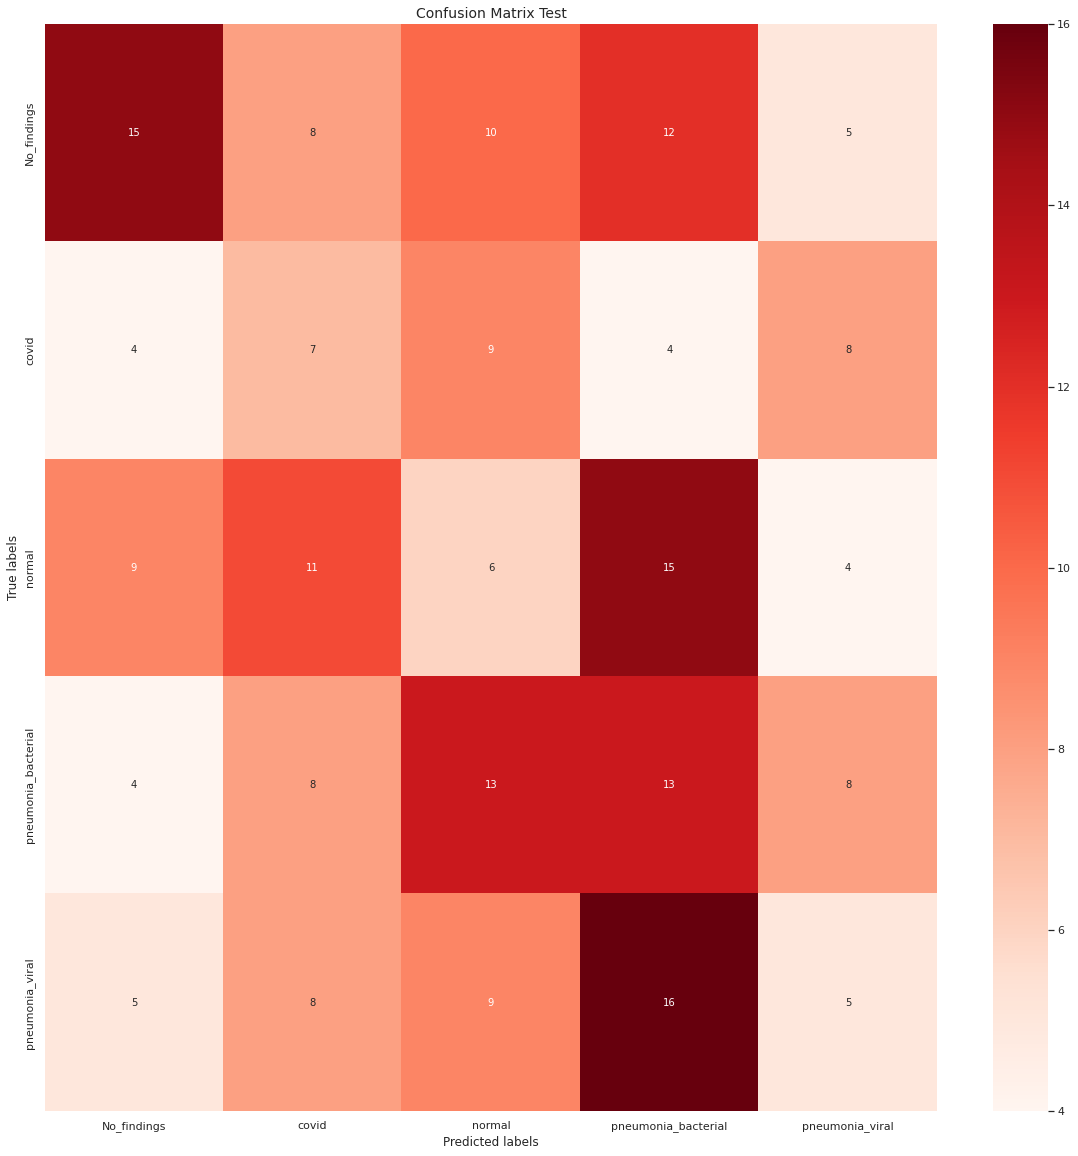

In [ ]:
generator_datagen = ImageDataGenerator(
      rescale = 1./255,
        rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

TESTING_DIR = "/content/gdrive/MyDrive/Splitted/test"
test_generator = generator_datagen.flow_from_directory(
    TESTING_DIR,
    target_size=(height, width),
    class_mode='categorical',
  batch_size=batch_size
)

predictions  = model.predict(test_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_names  = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

#testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(5,5)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

                     precision    recall  f1-score   support

        No_findings       0.41      0.30      0.34        50
              covid       0.17      0.22      0.19        32
             normal       0.13      0.13      0.13        45
pneumonia_bacterial       0.22      0.28      0.25        46
    pneumonia_viral       0.17      0.12      0.14        43

           accuracy                           0.21       216
          macro avg       0.22      0.21      0.21       216
       weighted avg       0.22      0.21      0.21       216

